<a href="https://colab.research.google.com/github/nada59/intelligence-artificielle/blob/main/hierarchical%20clustering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("CC GENERAL (1).csv" , delimiter= ",")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [6]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [7]:
#Clustering Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [9]:
data=df.drop("CUST_ID", axis=1)

In [10]:
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
normalized_data = normalize(scaled_data) 
normalized_data = pd.DataFrame(normalized_data)  
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [11]:
# Hierarchical Clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)

In [14]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,2
2,0
3,1
4,1
...,...
8944,0
8945,0
8946,1
8947,1


In [15]:
#Agglomerative Cluster Plot

In [16]:
import matplotlib.pyplot as plt

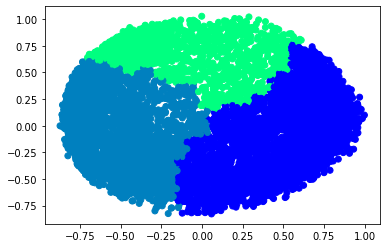

In [17]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

In [18]:
#Dendrogram Plot

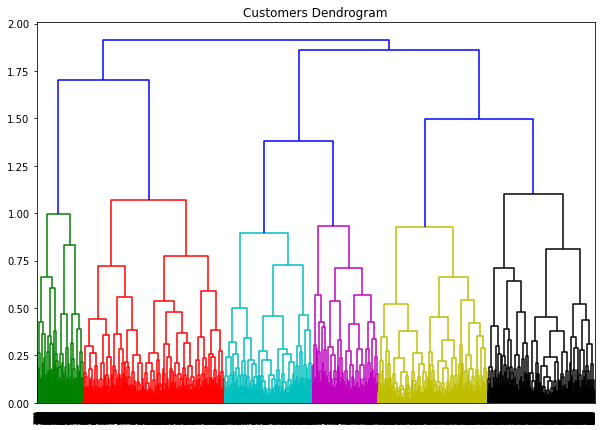

In [19]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customers Dendrogram")
dend=shc.dendrogram(shc.linkage(X_principal, method="complete"))

In [20]:
#K-Menas-Clustering
from sklearn.cluster import KMeans

In [21]:
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_principal)

KMeans(n_clusters=4, random_state=0)

In [22]:
labels=kmeans.labels_
labels

array([3, 1, 0, ..., 2, 3, 2], dtype=int32)

In [23]:
clusters = pd.concat([data, pd.DataFrame({"cluster":labels})], axis=1)

In [24]:
pca = PCA(2)
principalComponents = pca.fit_transform(normalized_data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)
colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

(8949, 2)


In [25]:
final_data = pd.DataFrame({"x": x, "y":y, "label":labels})
groups = final_data.groupby(labels)

In [26]:
kmeans.predict(X_principal)
print(kmeans.cluster_centers_)

[[ 0.56725741  0.33587517]
 [-0.4427754   0.51646518]
 [ 0.41965407 -0.31826264]
 [-0.47903389 -0.29194892]]


In [27]:
# K-best Value

In [28]:
sum_of_squared_distances = []
K= range (1,15)
for k in K:
    km= KMeans(n_clusters=k)
    km=km.fit(final_data)
    sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)

[15588.789646735237, 5187.624029754566, 2846.9074849742874, 927.7918657330817, 790.7376974944591, 679.2233347821217, 572.1805297331409, 470.040916688414, 426.1668348363694, 388.4170045706154, 344.5604429576553, 312.61954759408417, 283.34308514985435, 259.07509008973483]


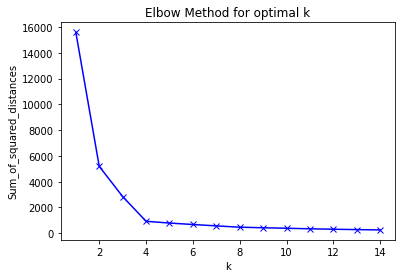

In [29]:
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method for optimal k")
plt.show()

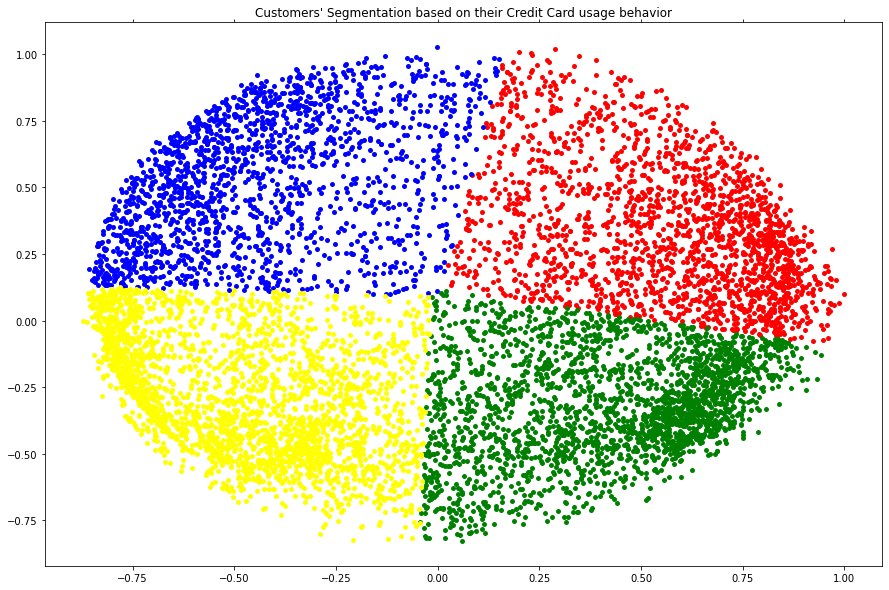

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.set_title("Customers' Segmentation based on their Credit Card usage behavior")
plt.show()

In [31]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score



In [32]:
print(f'Davies-Bouldin index = {davies_bouldin_score(X_principal, labels)}')
print(f'Silhouette Score = {silhouette_score(X_principal, labels)}')

Davies-Bouldin index = 0.8103156983933859
Silhouette Score = 0.42644710802768115


In [33]:
print(f'Davies-Bouldin index = {davies_bouldin_score(final_data, labels)}')
print(f'Silhouette Score = {silhouette_score(final_data, labels)}')

Davies-Bouldin index = 0.42841119165945024
Silhouette Score = 0.7148140484728487
